<a href="https://colab.research.google.com/github/Gracey701/Sales_Predictions/blob/main/Sales_Predictions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 1


  - Grace Seo

## Loading Data

In [64]:
import pandas as pd

In [65]:
filename = '/content/sales_predictions.csv'

In [66]:
# Set display options
# Display all columns
pd.set_option('display.max_column', None)
# Display full width of field
pd.set_option('display.max_colwidth', None)
# Display table across entire available view
pd.set_option('display.width', -1)
# Display all rows
pd.set_option('display.max_rows', None)

In [67]:
sales_predictions = pd.read_csv(filename)
sales_predictions.info()
sales_predictions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

How many rows and columns
  - Based on the previous info data, there are 8523 rows (entries) and 12 columns

What are the datatypes of each variable?

In [68]:
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there duplicates? If so, drop any duplicates.

In [69]:
sales_predictions.duplicated().sum()

0

Identify missing values

In [70]:
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Decide on how to address the missing values and do it!
 - As Item_Weight is probably important for its likelihood to be bought this data will be kept in and the missing values will be replaced with the column average as it's a float type.

In [71]:
mean_weight = sales_predictions['Item_Weight'].mean()
sales_predictions['Item_Weight'].fillna(mean_weight, inplace=True)
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [72]:
sales_predictions['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

 - For the outlet_size missing values, the whole column will be deleted as it seems unnecessary to the task.

In [73]:
sales_predictions.drop(columns='Outlet_Size', inplace=True)
sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Find and fix any inconsistent categories of data.

In [74]:
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [75]:
sales_predictions['Item_Fat_Content'].replace(['reg','low fat', 'LF'],['Regular', 'Low Fat', 'Low Fat'], inplace=True)
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [76]:
sales_predictions['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [77]:
sales_predictions['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [78]:
sales_predictions['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

- Only Item_Fat_Content had inconsistent categorical data, which has been resolved.

Obtain the summary statistices of each (min, max, mean) for numerical **columns**

In [79]:
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [80]:
min = sales_predictions.min()
min

Item_Identifier                      DRA12
Item_Weight                          4.555
Item_Fat_Content                   Low Fat
Item_Visibility                        0.0
Item_Type                     Baking Goods
Item_MRP                             31.29
Outlet_Identifier                   OUT010
Outlet_Establishment_Year             1985
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                    33.29
dtype: object

In [81]:
max = sales_predictions.max()
max

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                       Regular
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                   13086.9648
dtype: object

In [82]:
mean = sales_predictions.mean()
mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

- Only need the data for numerical columns of Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales. The other numbers are not values and categorical.

##Exploratory Visuals

Histograms

In [83]:
import matplotlib.pyplot as plt

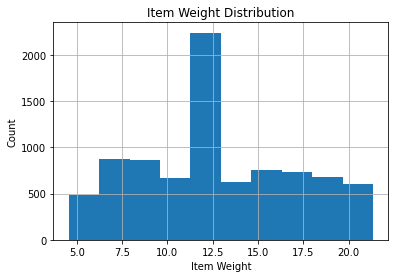

Most items sold are between the weight of around 11 to 12.6 units. 
The lightest item sold is around 4.8 and the heaviest is around 21.


In [84]:
sales_predictions['Item_Weight'].hist(bins=10)
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.title('Item Weight Distribution');
plt.show()
print('Most items sold are between the weight of around 11 to 12.6 units. \nThe lightest item sold is around 4.8 and the heaviest is around 21.')

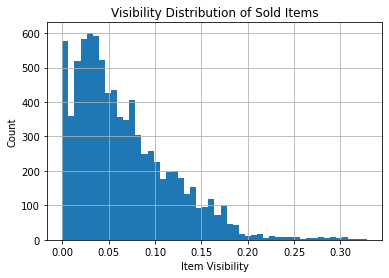

The items with the least visibility percentage have a much higher sale rate, 
whereas the items with higher visibility have almost to none sold.


In [85]:
sales_predictions['Item_Visibility'].hist(bins='auto')
plt.xlabel('Item Visibility')
plt.ylabel('Count')
plt.title('Visibility Distribution of Sold Items');
plt.show()
print('The items with the least visibility percentage have a much higher sale rate, \nwhereas the items with higher visibility have almost to none sold.')

Boxplots

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


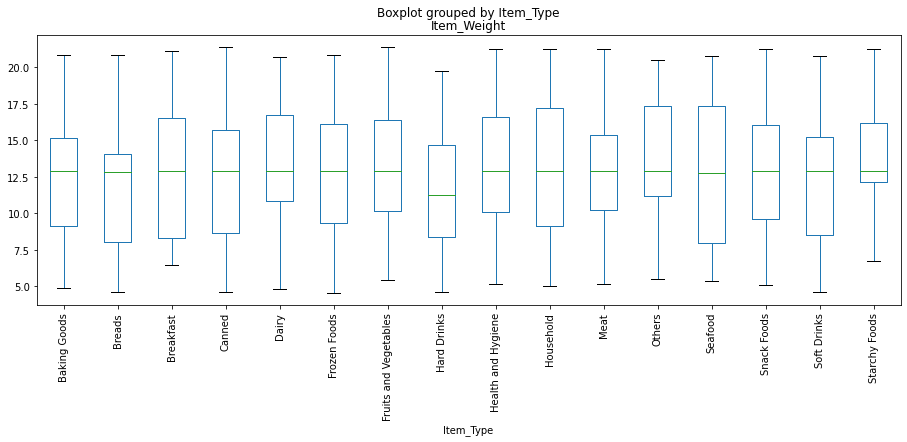

Most of the item types sold seem to have similar max weights, as well as their median. 
Hard drinks seems to be an outlying item with a much lower median.


In [86]:
sales_predictions.boxplot(['Item_Weight'],
                          by = 'Item_Type',
                          figsize = (15,5),
                          rot = 90,
                          grid = False);
plt.show()
print('Most of the item types sold seem to have similar max weights, as well as their median. \nHard drinks seems to be an outlying item with a much lower median.')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


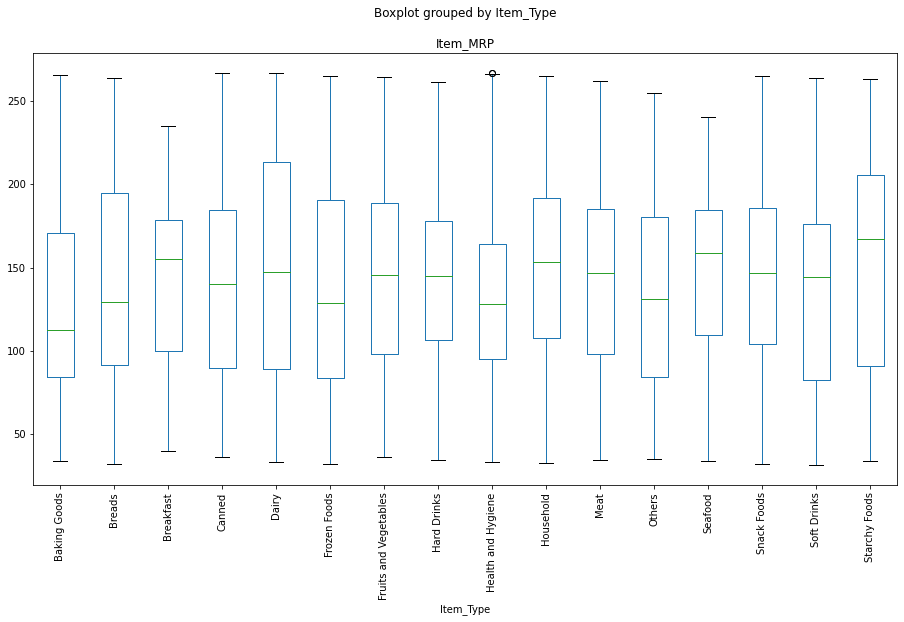

Most of the varying item types have similar minimum MRPs, but have differing maximum MRPs. 
Breakfast items has the lowest maximum value.


In [87]:
sales_predictions.boxplot(['Item_MRP'],
                          by = 'Item_Type',
                          figsize = (15,8),
                          rot = 90,
                          grid = False);
plt.show()
print('Most of the varying item types have similar minimum MRPs, but have differing maximum MRPs. \nBreakfast items has the lowest maximum value.')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


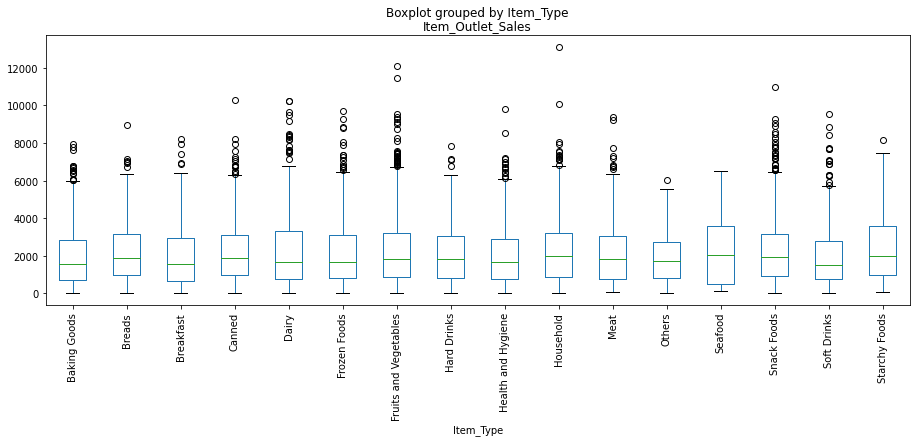

All item types except seafood seem to have many outliers exceeding the maximum according to the boxplots plotted below. 
Household items has had the highest sale.


In [88]:
sales_predictions.boxplot(['Item_Outlet_Sales'],
                          by = 'Item_Type',
                          figsize = (15,5),
                          rot = 90,
                          grid = False);
plt.show()
print('All item types except seafood seem to have many outliers exceeding the maximum according to the boxplots plotted below. \nHousehold items has had the highest sale.')

Heatmaps

In [89]:
corr = sales_predictions.corr()

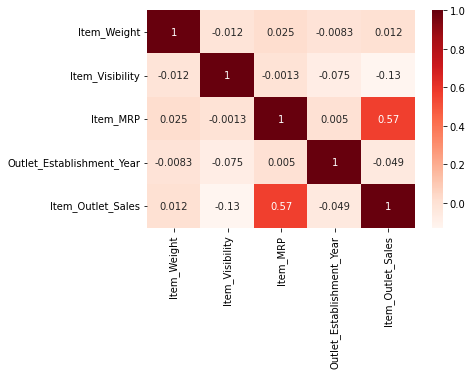

The only relationship with a positive strong correlation is that between item outlet sales and item MRP. 
With a higher MRP the item outlet sales goes up as well. No other relationship seems to have a strong enough correlation to take note of.


In [90]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Reds', annot = True);
plt.show()
print('The only relationship with a positive strong correlation is that between item outlet sales and item MRP. \nWith a higher MRP the item outlet sales goes up as well. No other relationship seems to have a strong enough correlation to take note of.')

## Explanatory Visuals

In [92]:
location_sales = sales_predictions.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
location_sales

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

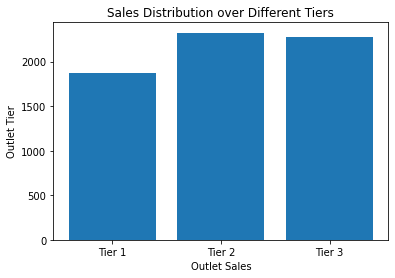

Overall, the outlets that made mose sales are the ones in Tier 2 and 3 
with Tier 1 making the least amount of sales.


In [98]:
plt.bar(location_sales.index, location_sales.values)
plt.ylabel('Outlet Tier')
plt.xlabel('Outlet Sales')
plt.title('Sales Distribution over Different Tiers');
plt.show()
print('Overall, the outlets that made mose sales are the ones in Tier 2 and 3 \nwith Tier 1 making the least amount of sales.')

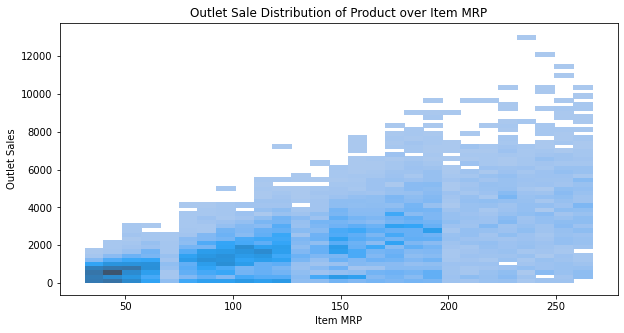

With a higher maximum retail price, the product seems to be more likely to have a higher sale rate.


In [109]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data = sales_predictions, x = 'Item_MRP', y = 'Item_Outlet_Sales')
ax.set(title='Outlet Sale Distribution of Product over Item MRP', xlabel='Item MRP', ylabel='Outlet Sales');
plt.show()
print('With a higher maximum retail price, the product seems to be more likely to have a higher sale rate.')

In [112]:
itemtypesale = sales_predictions.groupby(['Item_Type','Outlet_Location_Type']).mean().reset_index()
itemtypesale.head()

,Item_Type,Outlet_Location_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Baking Goods,Tier 1,12.354480,0.072284,124.389121,1994.924324,1766.342208
1,Baking Goods,Tier 2,12.438460,0.063576,126.258343,2004.374408,2052.633001
2,Baking Goods,Tier 3,12.343224,0.071565,127.945391,1994.222222,2006.533613
3,Breads,Tier 1,11.362050,0.069338,146.045788,1994.880597,2049.382087
4,Breads,Tier 2,11.248869,0.063174,137.639740,2004.000000,2275.347721


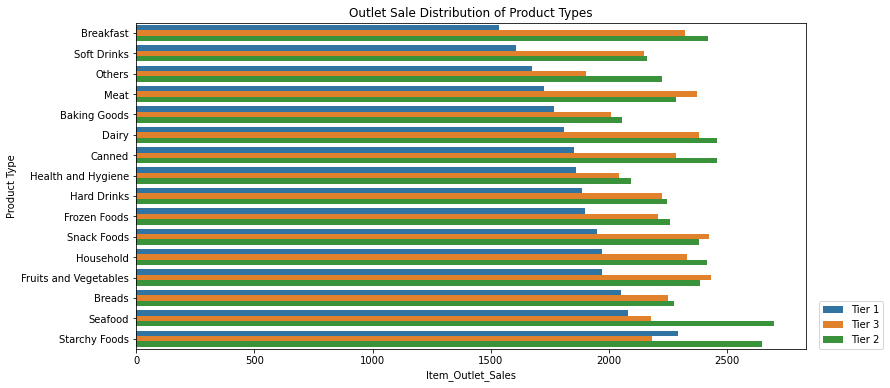

Based solely on the distribution of tier 1 outlet product sales, breakfast products had the least amount of sales with starchy foods having the most. 
However, tier 2 and 3 breakfast items had one of the highest amount of sales.


In [120]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data = itemtypesale, x = 'Item_Outlet_Sales', y = 'Item_Type', hue = 'Outlet_Location_Type')
ax.set(title='Outlet Sale Distribution of Product Types', xlabel='Item_Outlet_Sales', ylabel='Product Type')
plt.legend(loc=(1.02,0));
plt.show()
print('Based solely on the distribution of tier 1 outlet product sales, breakfast products had the least amount of sales with starchy foods having the most. \nHowever, tier 2 and 3 breakfast items had one of the highest amount of sales.')